In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Explicit Euler Method

In [2]:
def step(x, v, h):
    xf = x + v*h
    vf = v - x*h
    return xf, vf
def investigate(h, tmax, x0=10, v0=0, energy=False, stepFunc=step):
    times = np.arange(0, tmax, h)
    pos = np.zeros_like(times)
    speeds = np.zeros_like(times)
    for i in range(times.size):
        pos[i] = x0
        speeds[i] = v0
        x0, v0 = stepFunc(x0, v0, h)
    if energy == True:
        return times, np.square(pos)+np.square(speeds)
    return times, pos, speeds

In [3]:
t, x, v = investigate(.01, 20, 10, 0)

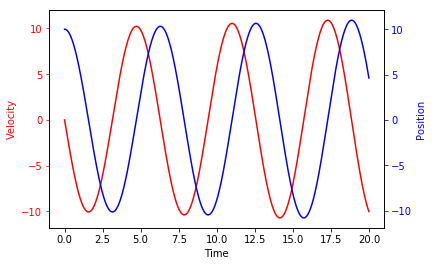

In [4]:
plt.plot(t, v, label="Velocity, v", color="red")
plt.xlabel("Time")
plt.ylabel("Velocity", color="red")
plt.gca().tick_params('y', colors='r')
ax2 = plt.gca().twinx()
ax2.plot(t, x, label="Position, x", color="blue")
ax2.set_ylabel("Position", color="blue")
ax2.tick_params('y', colors='b')
plt.savefig("TVP1.jpg", dpi=500)
plt.show()

In [5]:
def getErrors(tlist, xlist, vlist, x0, v0, maxE=False, retAnal=False):
    def x(t):
        return x0 * np.cos(t) + v0 * np.sin(t)
    def v(t):
        return -x0 * np.sin(t) + v0 * np.cos(t)
    xanal = x(tlist)
    vanal = v(tlist)
    if retAnal == True:
        return tlist, xanal, vanal
    xerrors = xanal - xlist
    verrors = vanal - vlist
    if maxE == True:
        return max(abs(xerrors))
    return tlist, xerrors, verrors

In [6]:
te, xe, ve = getErrors(t, x, v, 10, 0)

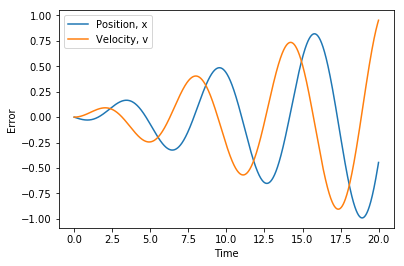

In [7]:
plt.plot(te, xe, label="Position, x")
plt.plot(te, ve, label="Velocity, v")
plt.xlabel("Time")
plt.ylabel("Error")
plt.legend()
#plt.savefig("TErr1.jpg", dpi=500)
plt.show()

In [8]:
h0 = 0.01
hVals = [h0, h0/2, h0/4, h0/8, h0/16]
maxErrors = [0]*5
for i in range(len(hVals)):
    terr, xerr, verr = investigate(hVals[i], 20, 10, 0)
    maxErr = getErrors(terr, xerr, verr, 10, 0, 1)
    maxErrors[i] = maxErr

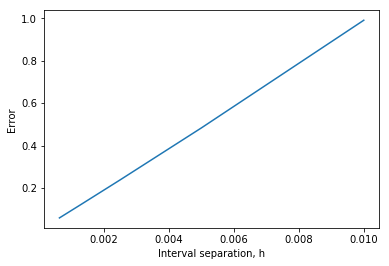

In [9]:
plt.plot(hVals, maxErrors)
plt.xlabel("Interval separation, h")
plt.ylabel("Error")
plt.savefig("hErr1.jpg", dpi=500)
plt.show()

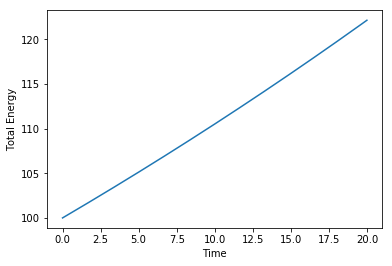

In [10]:
times, energies = investigate(.01, 20, 10, 0, 1)
plt.plot(times, energies)
plt.xlabel("Time")
plt.ylabel("Total Energy")
plt.savefig("TE1.jpg", dpi=500)
plt.show()

# Implicit Euler Method

$
\begin{bmatrix}
    1       & -h  \\
    h       & 1  \\
\end{bmatrix}
\cdot
\begin{bmatrix}
    x_{i+1} \\
    v_{i+1} \\
\end{bmatrix}
= 
\begin{bmatrix}
    x_{i} \\
    v_{i} \\
\end{bmatrix}
\implies
\begin{bmatrix}
    x_{i+1} \\
    v_{i+1} \\
\end{bmatrix}
= 
\begin{bmatrix}
    1       & -h  \\
    h       & 1  \\
\end{bmatrix}
^{-1} \cdot
\begin{bmatrix}
    x_{i} \\
    v_{i} \\
\end{bmatrix}
= 
\begin{bmatrix}
    \frac{1}{1+h^2}       & \frac{h}{1+h^2}  \\
    -\frac{h}{1+h^2}       & \frac{1}{1+h^2}  \\
\end{bmatrix}
\cdot
\begin{bmatrix}
    x_{i} \\
    v_{i} \\
\end{bmatrix}.
$

Thus, 
$
x_{i+1} = \frac{x_i}{1+h^2} + \frac{v_i h}{1+h^2} = \frac{x_i + v_i h}{1+h^2}
$
and
$
v_{i+1} = -\frac{x_i h}{1+h^2} + \frac{v_i}{1+h^2} = \frac{v_i - x_i h}{1+h^2}.
$

In [11]:
def implicitStep(x, v, h):
    xf = (x + v*h)/(1 + h**2)
    vf = (v - x*h)/(1 + h**2)
    return xf, vf

In [12]:
ti, xi, vi = investigate(.01, 20, 10, 0, stepFunc=implicitStep)

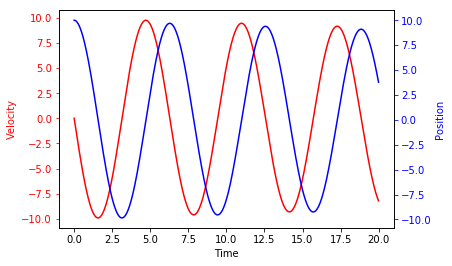

In [13]:
plt.plot(ti, vi, label="Velocity, v", color="red")
plt.xlabel("Time")
plt.gca().tick_params('y', colors='r')
plt.ylabel("Velocity", color="red")
ax2 = plt.gca().twinx()
ax2.plot(ti, xi, label="Position, x", color="blue")
ax2.set_ylabel("Position", color="blue")
ax2.tick_params('y', colors='b')
plt.savefig("TVP2.jpg", dpi=500)
plt.show()

In [14]:
tie, xie, vie = getErrors(ti, xi, vi, 10, 0)

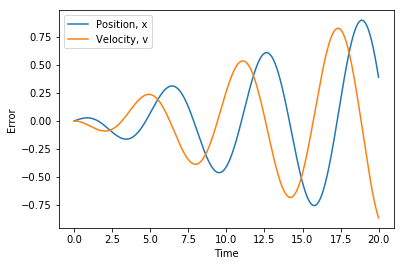

In [15]:
plt.plot(tie, xie, label="Position, x")
plt.plot(tie, vie, label="Velocity, v")
plt.xlabel("Time")
plt.ylabel("Error")
plt.legend()
plt.savefig("TErr2.jpg", dpi=500)
plt.show()

In [16]:
h0 = 0.01
hVals = [h0, h0/2, h0/4, h0/8, h0/16]
maxErrors = [0]*5
for i in range(len(hVals)):
    terr, xerr, verr = investigate(hVals[i], 20, 10, 0, stepFunc=implicitStep)
    maxErr = getErrors(terr, xerr, verr, 10, 0, 1)
    maxErrors[i] = maxErr

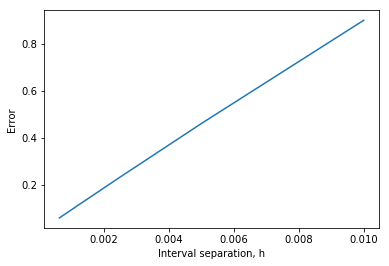

In [17]:
plt.plot(hVals, maxErrors)
plt.xlabel("Interval separation, h")
plt.ylabel("Error")
plt.savefig("hErr2.jpg", dpi=500)
plt.show()

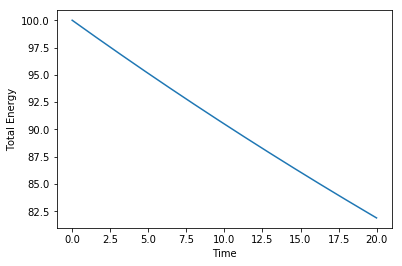

In [18]:
times, energies = investigate(.01, 20, 10, 0, 1, implicitStep)
plt.plot(times, energies)
plt.xlabel("Time")
plt.ylabel("Total Energy")
plt.savefig("TE2.jpg", dpi=500)
plt.show()

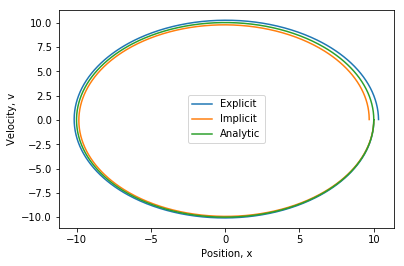

In [19]:
t, x, v = investigate(.01, 2*np.pi, 10, 0)
plt.plot(x, v, label="Explicit")
t, x, v = investigate(.01, 2*np.pi, 10, 0, stepFunc=implicitStep)
plt.plot(x, v, label="Implicit")
t, x, v = getErrors(t, x, v, 10, 0, maxE=False, retAnal=True)
plt.plot(x, v, label="Analytic")
plt.legend()
plt.xlabel("Position, x")
plt.ylabel("Velocity, v")
plt.savefig("phase1.jpg", dpi=500)
plt.show()

# Symplectic Euler Method

$
x_{i+1} = x_i + hv_i\\
v_{i+1} = v_i - hx_{i+1} = (1-h^2)v_i - hx_i
$

In [20]:
def symplecticStep(x, v, h):
    xf = (x + v*h)
    vf = (1-h**2)*v - h*x
    return xf, vf

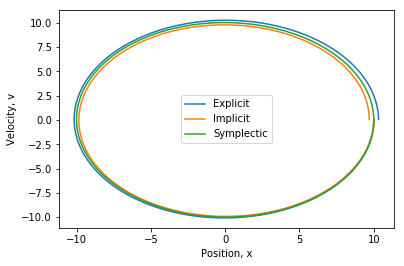

In [21]:
t, x, v = investigate(.01, 2*np.pi, 10, 0)
plt.plot(x, v, label="Explicit")
t, x, v = investigate(.01, 2*np.pi, 10, 0, stepFunc=implicitStep)
plt.plot(x, v, label="Implicit")
t, x, v = investigate(.01, 2*np.pi, 10, 0, stepFunc=symplecticStep)
plt.plot(x, v, label="Symplectic")
plt.legend()
plt.xlabel("Position, x")
plt.ylabel("Velocity, v")
plt.savefig("phase2.jpg", dpi=500)
plt.show()

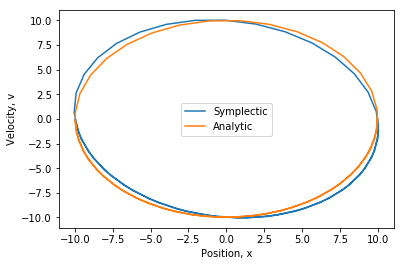

In [22]:
plt.figure()
t, x, v = investigate(.2, 3*np.pi, 10, 0, stepFunc=symplecticStep)
plt.plot(x, v, label="Symplectic")
t, x, v = getErrors(t, x, v, 10, 0, maxE=False, retAnal=True)
plt.plot(x, v, label="Analytic")
plt.legend()
plt.xlabel("Position, x")
plt.ylabel("Velocity, v")
plt.savefig("phase3.jpg", dpi=500)
plt.show()

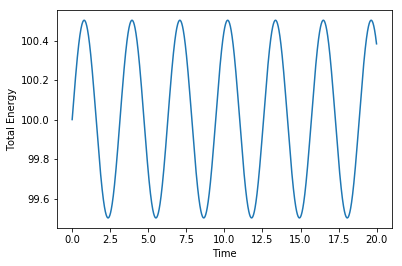

In [23]:
times, energies = investigate(.01, 20, 10, 0, 1, symplecticStep)
plt.plot(times, energies)
plt.xlabel("Time")
plt.ylabel("Total Energy")
plt.savefig("TE3.jpg", dpi=500)
plt.show()

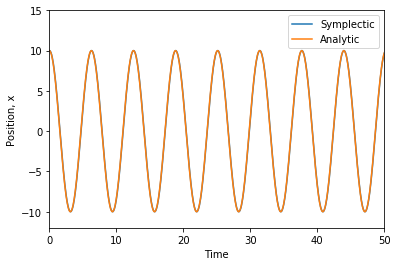

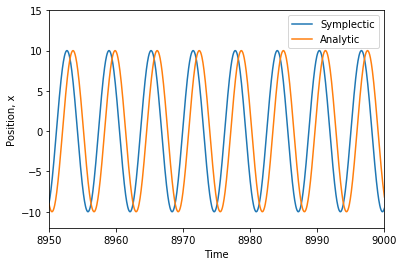

In [24]:
t, x, v = investigate(.05, 3000*np.pi, 10, 0, stepFunc=symplecticStep)
plt.plot(t, x, label="Symplectic")
t, x, v = getErrors(t, x, v, 10, 0, maxE=False, retAnal=True)
plt.plot(t, x, label="Analytic")
plt.xlim(0, 50)
plt.ylabel("Position, x")
plt.xlabel("Time")
plt.ylim(-12, 15)
plt.legend()
plt.savefig("offset1.jpg", dpi=500)
plt.show()
t, x, v = investigate(.05, 3000*np.pi, 10, 0, stepFunc=symplecticStep)
plt.plot(t, x, label="Symplectic")
t, x, v = getErrors(t, x, v, 10, 0, maxE=False, retAnal=True)
plt.plot(t, x, label="Analytic")
plt.xlim(8950, 9000)
plt.ylim(-12, 15)
plt.ylabel("Position, x")
plt.xlabel("Time")
plt.legend()
plt.savefig("offset2.jpg", dpi=500)
plt.show()